
#  📙 Filtrage
Le filtrage est une technique permettant de modifier ou d'améliorer une image. 
Par essence, un filtre est une fonction mathématique qui est appliquée aux images. 
Il peut être utilisé pour accentuer ou supprimer certaines caractéristiques, comme les bords. 
Lissage, accentuation et détection des bords. On peut donc dire que le filtrage est une technique permettant de :
- Modifier ou améliorer une image,
- Accentuer ou supprimer certaines caractéristiques, comme les bords,
- Lissage, accentuation,
- Détection des bords.

Le filtrage est une opération de voisinage. 
Où, **Voisinage** signifie : Il s'agit d'une opération de traitement d'image qui consiste à traiter une image par sections, appelées blocs ou voisinages, plutôt que de traiter l'image entière en une seule fois. 
Le filtrage, l'égalisation d'histogramme pour l'amélioration du contraste et les fonctions morphologiques utilisent tous trois cette approche.

### 📌 Détection des bords
Le filtrage permet de détecter les bords. 
Cette technique peut être utilisée pour trouver les limites des objets dans les images. 
Elle permet également de segmenter et d'extraire des informations telles que le nombre de pièces de monnaie présentes dans une image. 
La plupart des informations de forme d'une image sont contenues dans les bords.

La détection des bords fonctionne en détectant les discontinuités dans la luminosité. 
Comme dans cette image, où nous repérons les formes de baisers au chocolat dans l'image.

Originale            |  Contours avec Sobel
:-------------------------:|:-------------------------:
![](data/CM_SampleImages/Chapter2/originalChocolate.png)  |  ![](data/CM_SampleImages/Chapter2/edgeWithSobel.png)

<br/>

### 📌 Algorithme de détection des bords
#### Sobel
Un algorithme commun de détection des bords est **Sobel**. 
C'est un filtre que l'on peut trouver dans le module filters de scikit image avec la fonction sobel. 
Nous appliquons le filtre en passant l'image dont nous voulons détecter les bords comme paramètre. 
Cette fonction nécessite une image en niveaux de gris à 2 dimensions comme entrée. 
Donc, dans le cas d'une image colorée, nous devons d'abord la convertir en niveaux de gris. 
Ensuite, nous montrons l'image originale et l'image résultante à l'aide d'une fonction qui utilise les sous-plans de Matplotlib.

```python
# Importer le module et la fonction
from skimage.filters import sobel

# Appliquer le filtre de détection des bords
edge_sobel = sobel(image_coins)

# Affichage l'image originale et l'image résultante pour les comparer
plot_comparison(image_coins, edge_sobel, "Contours avec Sobel")
```

Originale            |  Contours avec Sobel
:-------------------------:|:-------------------------:
![](data/CM_SampleImages/Chapter2/original_coin.png)  |  ![](data/CM_SampleImages/Chapter2/edgeWithSobelCoin.png)

<br/>

#### Comparaison de tracés
Fonction de comparaison d'une image originale et d'une image filtrée (Les détails de cette fonction ne sont pas abordés dans ce cours).

```python
def plot_comparison(original, filtered, title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 6), sharex=True, sharey=True)
    
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis('off')
```


### 📌 Lissage
#### Filtre gaussien
On peut y parvenir avec un filtre gaussien. 
Cette technique est généralement utilisée pour flouter une image ou pour réduire le bruit. 

Pour appliquer le filtre, l'image originale est passée comme premier paramètre à la fonction Gaussienne et le paramètre booléen multicanal est mis à True si l'image est colorée, sinon il doit être mis à False. 
Enfin, nous allons comparer l'image originale et l'image résultante.

```python
# Importer le module et la fonction
from skimage.filters import gaussian

# Application le filtre de détection des bords
gaussian_image = gaussian(amsterdam_pic, multichannel=True)

# Affichage de l'image originale et l'image résultante
plot_comparison(amsterdam_pic, gaussian_image, "Flou avec un filtre gaussien")
```
Guassian filter can blur the image and remove noise from image


<br/>

### 📝 Détection des bords
Dans cet exercice, nous allons détecter les bords d'une image en appliquant le filtre de Sobel.



In [1]:
import numpy as np
import matplotlib.pyplot as plt

def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')

def plot_comparison(img_original, img_filtered, img_title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8), sharex=True, sharey=True)
    ax1.imshow(img_original, cmap=plt.cm.gray)
    ax1.set_title('Originale')
    ax1.axis('off')
    ax2.imshow(img_filtered, cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    ax2.axis('off')

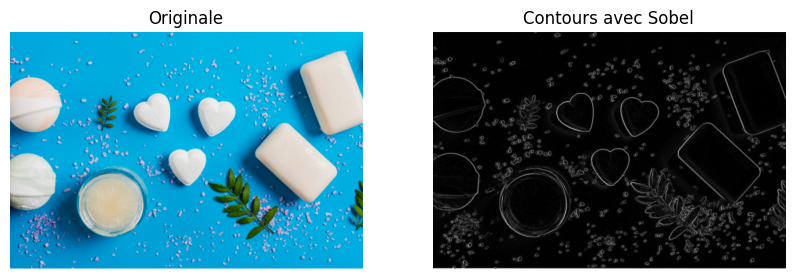

In [2]:
from skimage import color
from skimage.filters import sobel

soaps_image = plt.imread('data/CM_SampleImages/Chapter2/soap_image.png')

# Faire l'image en niveaux de gris
soaps_image_gray = color.rgb2gray(color.rgba2rgb(soaps_image))

# Appliquer les filtres de détection des bords
edge_sobel = sobel(soaps_image_gray)

# Afficher la comparaison
plot_comparison(soaps_image, edge_sobel, "Contours avec Sobel")

<br/>

### 📝 Flouter pour réduire le bruit
Dans cet exercice, nous allons réduire la netteté d'une image d'un bâtiment prise lors d'un voyage à Londres, grâce à un filtrage.

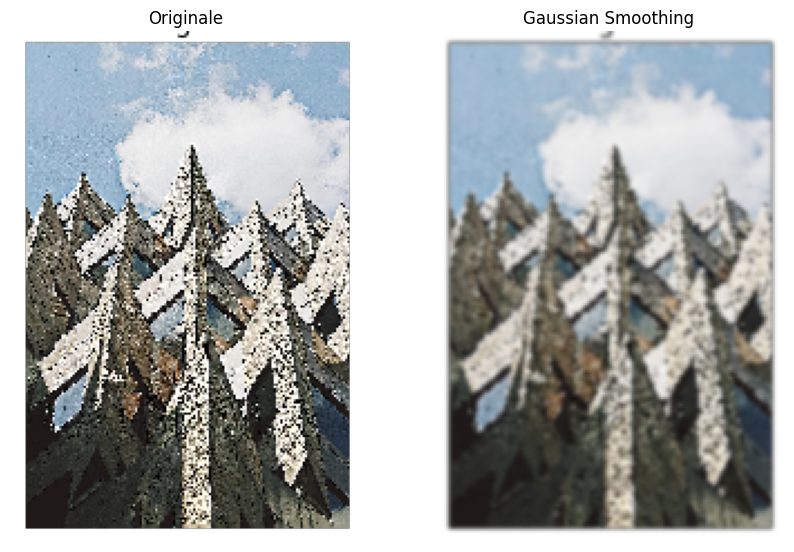

In [3]:
from skimage.filters import gaussian

# Lire l'image
building_image = plt.imread('data/CM_SampleImages/Chapter2/building.png')

# Appliquer le filtre
gaussian_image = gaussian(building_image, channel_axis=-1)

# Afficher la comparaison
plot_comparison(building_image, gaussian_image, "Gaussian Smoothing")

<br/><br/>

#  📙 Amélioration du contraste
L'amélioration des images peut être extrêmement utile dans de nombreux domaines. 
Souvent, les images médicales comme cette radiographie présentent un faible contraste, ce qui rend difficile la détection des détails importants. 
Lorsque nous améliorons le contraste, les détails deviennent plus visibles. 
Il est définitivement plus facile de repérer les choses sur cette image !

Le **Contraste** d'une image peut être considéré comme la mesure de sa gamme dynamique, ou la "propagation" de son histogramme. Considérons l'image suivante: 

<img src="data/CM_SampleImages/Chapter2/imageHistogram.png" center/>

Le contraste est la différence entre l'intensité maximale et minimale des pixels de l'image. 
L'histogramme de cette image est montré à droite. 
La valeur maximale de l'intensité des pixels est de 255, tandis que la valeur minimale est de 0. 255 - 0 = 255.

Une image à faible contraste présente une faible différence entre les valeurs sombres et claires de ses pixels. 
Elle est généralement orientée vers la droite (principalement claire), vers la gauche (principalement sombre) ou vers le milieu (principalement grise).


<img src="data/CM_SampleImages/Chapter2/histogramImage.png" center/>

<br/>

## Amélioration du contraste
- Étirement du contraste (il est utilisé pour étirer l'histogramme afin que toute la gamme des valeurs d'intensité de l'image soit remplie)
- Égalisation de l'histogramme (elle permet d'étaler les valeurs d'intensité de l'histogramme les plus fréquentes en utilisant une distribution de probabilité)
    - Égalisation d'histogramme
    - Égalisation adaptative de l'histogramme
    - Égalisation adaptative d'histogramme à contraste limité (CLAHE)


### 📌 Égalisation d'histogramme
Comme nous l'avons vu l'égalisation d'histogramme étale les valeurs d'intensité les plus fréquentes.

Pour appliquer ce type d'égalisation d'histogramme, il faut importer le module exposure de scikit-image. 
Nous avons alors accès à toutes les méthodes d'égalisation. 
Dans ce cas, la fonction equalize_hist, applique une égalisation d'histogramme normale à l'image originale. Ensuite, nous montrons les deux images, l'originale et celle égalisée pour voir la différence.
```python
from skimage import exposure

# Obtain the equalized image
image_eq = exposure.equalize_hist(image)

# Show original and result
show_image(image, 'Originale')
show_image(image_eq, 'Image après égalisation d\'histogramme')
```

<img src="data/CM_SampleImages/Chapter2/hiequ.png" center/>

Utilisation de l'égalisation d'histogramme.
Nous obtenons un résultat qui, malgré l'augmentation du contraste, ne semble pas naturel. 
En fait, il ne semble même pas que l'image ait été améliorée du tout.

<br/>

### 📌 Égalisation adaptative
L'égalisation adaptative calcule plusieurs histogrammes, chacun correspondant à une partie distincte de l'image, et les utilise pour redistribuer les valeurs de luminosité de l'histogramme de l'image. 
Un type de cette méthode est le Contrastive Limited Adaptive Histogram Equalization (CLAHE) qui a été développé pour éviter la sur-amplification du bruit que l'égalisation adaptative de l'histogramme peut engendrer. 
Dans cette image, nous voyons le résultat de la méthode CLAHE et il peut sembler très similaire à la méthode standard.

**Cela est dû au fait qu'elle ne prend pas l'histogramme global de l'image entière, mais opère sur de petites régions appelées tuiles ou voisinages.

#### CLAHE in scikit-image
```python
from skimage import exposure

# Apply adaptive Equalization
image_adapteq = exposure.equalize_adapthist(image, clip_limit=0.03)

# Show original and result
show_image(image, 'Originale')
show_image(image_adapteq, 'Image après égalisation d\'histogramme adaptative')
```

<img src="data/CM_SampleImages/Chapter2/adaptive.png" center/>



<br/>

### 📝 Images médicales
Nous essayons d'améliorer les outils d'un hôpital en prétraitant les images radiologiques afin que les médecins aient plus de chances de repérer les détails pertinents. 
Vous testerez notre code sur une radiographie de la poitrine provenant du National Institutes of Health Chest X-Ray Dataset.

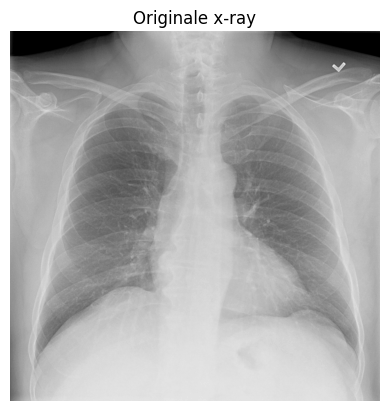

In [4]:
from skimage import exposure

chest_xray_image = plt.imread('data/CM_SampleImages/Chapter2/chest_xray_image.png')
 
# Affichage de l'image radiographique originale et de son histogramme
show_image(chest_xray_image, 'Originale x-ray')

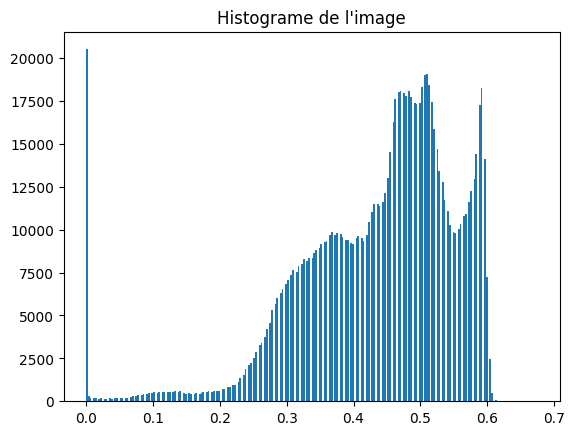

In [5]:
plt.title('Histograme de l\'image')
plt.hist(chest_xray_image.ravel(), bins=256);

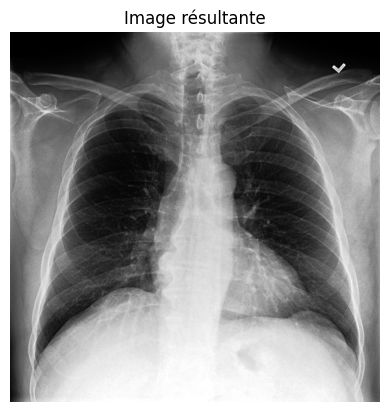

In [6]:
xray_image_eq = exposure.equalize_hist(chest_xray_image)

# Affichage de l'image résultante
show_image(xray_image_eq, 'Image résultante')

<br/><br/>

### 📝 Image aérienne
Dans cet exercice, nous allons améliorer la qualité d'une image aérienne d'une ville. 
L'image a un faible contraste et nous ne pouvons donc pas distinguer tous les éléments qu'elle contient.

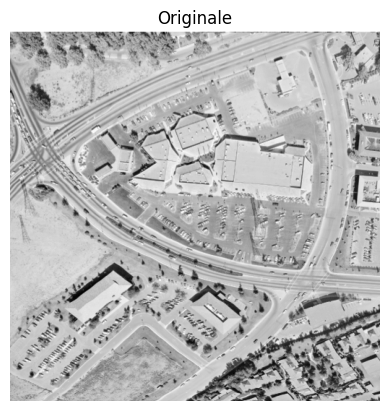

In [7]:
image_aerial = plt.imread('data/CM_SampleImages/Chapter2/arial_image.png')

# Affichage de l'image radiographique originale
show_image(image_aerial, 'Originale')

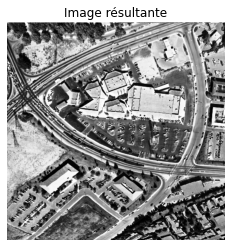

In [28]:
# Utilisation de l'égalisation d'histogramme pour améliorer le contraste
image_eq = exposure.equalize_hist(image_aerial)

show_image(image_eq, 'Image résultante')

<br/><br/>

### 📝 Ajoutons de l'impact et du contraste
Il arrive parfois que l'on veuille renforcer le contraste de ses photos pour qu'elles paraissent plus spectaculaires ?

Dans cet exercice, vous allez augmenter le contraste d'une tasse de café. 
Même s'il ne s'agit pas de notre tasse de café du dimanche matin, vous pouvez appliquer les mêmes méthodes à n'importe laquelle de vos photos.


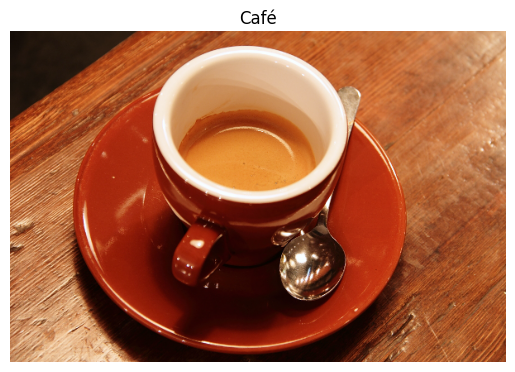

In [8]:
from skimage import data

# Chargement de l'image 
original_image = data.coffee()

# Affichage
show_image(original_image, "Café")

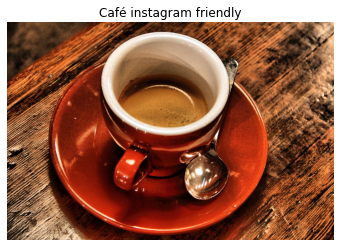

In [30]:
# Application de l'égalisation adaptative
adapthist_eq_image = exposure.equalize_adapthist(original_image, clip_limit=0.03)

show_image(adapthist_eq_image, 'Café instagram friendly')

<br/><br/>

#  📙 Transformations
Parfois, nous pouvons avoir besoin de transformer des images en les faisant pivoter ou en les redimensionnant. Mais pourquoi avons-nous besoin de transformer une image ?

- Préparation des images pour la classification des modèles d'apprentissage automatique
- Optimisation et compression des images
- Sauvegarder les images avec la même proportion

### 📌 Faire pivoter
Nous pouvons utiliser la fonction rotate du module scikit-image "transform" pour faire pivoter une image d'un certain angle autour de son centre, une fois que nous avons importé le module et la fonction. 
Dans ce code, nous obtenons l'image tournée de 90 degrés dans le sens des aiguilles d'une montre. 
Le premier paramètre est l'image que nous voulons faire pivoter et le second paramètre est l'angle. 
L'angle de rotation est en degrés dans le sens inverse des aiguilles d'une montre ou dans le sens contraire. Nous utilisons donc des valeurs négatives. 

##### Rotation dans le sens des aiguilles d'une montre
```python
from skimage.transform import rotate

# Faire pivoter l'image de 90 degrés dans le sens des aiguilles d'une montre
image_rotated = rotate(image, -90)
show_image(image_rotated, 'Originale')

# Afficher l'image pivotée
show_image(image_rotated, 'Rotation de 90 degrés dans le sens des aiguilles d\'une montre')
```

##### Rotation dans le sens inverse des aiguilles d'une montre
```python
from skimage.transform import rotate

# Faites pivoter l'image de 90 degrés dans le sens des aiguilles d'une montre
image_rotated = rotate(image, 90)
show_image(image_rotated, 'Originale')

# Montrer l'image pivotée
show_image(image_rotated, 'Rotation de 90 degrés dans le sens inverse des aiguilles d\'une montre')
```

### 📌 Remise à l'échelle
Nous pouvons utiliser la fonction rescale du module transform. Une fois importée, dans cet exemple, nous rendons une image 4 fois plus petite que sa taille d'origine en fixant le facteur d'échelle à 1/4. Le réglage du paramètre booléen anti_aliasing à true indique s'il faut appliquer un filtre pour lisser l'image avant la mise à l'échelle.

```python
from skimage.transform import rescale

# Rescale de l'image pour la rendre 4 fois plus petite
image_rescaled = rescale(image, 1/4, anti_aliasing=True, multichannel=True)

show_image(image, 'Image originale')
show_image(image_rescaled,'Image redimensionné')
```

#### Aliasing dans les images numériques
Dans une image numérique, le crénelage est un motif ou un effet d'ondulation. 
Le crénelage donne à l'image l'impression que des vagues ou des ondulations rayonnent à partir d'une certaine partie. Cela se produit lorsque la pixellisation de l'image est mauvaise, lorsqu'elle n'a tout simplement pas l'air correcte.

<img src="data/CM_SampleImages/Chapter2/aliasing.png" center/>

Ici, nous avons appliqué un redimensionnement de 1/30, et nous voyons ce que le filtre anti_aliasing fait à l'image lorsqu'il est activé. 
La première a l'anti_aliasing à True, donc nous voyons qu'elle est plus douce. 
Alors que celle qui ne l'a pas est pixellisée.

### 📌 Redimensionnement
Le redimensionnement est utilisé pour faire correspondre les images à une certaine taille. Le même but que rescale, mais permet de spécifier une forme d'image de sortie au lieu d'un facteur d'échelle.

```python
from skimage.transform import resize

# Height and width to resize
height = 400
width = 500

# Resize image
image_resized = resize(image, (height, width), anti_aliasing=True)

# Show the original and resulting images
show_image(image, 'Image originale')
show_image(image_resized, 'Image redimensionnée')
```

#### Redimensionnement proportionnel
Si nous voulons éviter les dimensions disproportionnées, nous pouvons redimensionner une image de manière proportionnelle. 
En prenant la largeur originale de l'image et en la divisant par le facteur d'échelle.

```python
from skimage.transform import resize

# Set proportional height so its 4 times its size
height = image.shape[0] / 4
width = image.shape[1] / 4

# Resize image
image_resized = resize(image, (height, width), anti_aliasing=True)

show_image(image_resized, 'Image redimensionnée')
```


<br/><br/>

### 📝Aliasing, rotation et redimensionnement

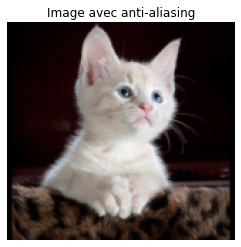

In [31]:
from skimage.transform import rotate, rescale

image_cat = plt.imread('data/CM_SampleImages/Chapter2/image_cat.jpg')

# Faites pivoter l'image de 90 degrés dans le sens des aiguilles d'une montre.
rotated_cat_image = rotate(image_cat, -90)

# Rééchelle avec anti-crénelage
rescaled_with_aa = rescale(rotated_cat_image, 1/4, anti_aliasing=True, channel_axis=-1)

# Redimensionnement sans anti-aliasing
rescaled_without_aa = rescale(rotated_cat_image, 1/4, anti_aliasing=False, channel_axis=-1)

# Affichage de l'image avec anti-aliasing
show_image(rescaled_with_aa, 'Image avec anti-aliasing')

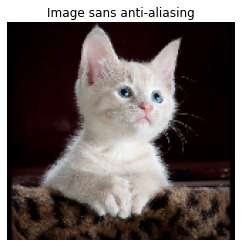

In [32]:
show_image(rescaled_without_aa, 'Image sans anti-aliasing')

<br/><br/>

### 📝Agrandissement des images
Avez-vous déjà essayé de redimensionner une image pour l'agrandir ? Cela se traduit généralement par une perte de qualité, l'image agrandie paraissant floue.

La bonne nouvelle est que l'algorithme utilisé par scikit-image fonctionne très bien pour agrandir les images jusqu'à un certain point.

Dans cet exercice, vous allez agrandir une image trois fois !

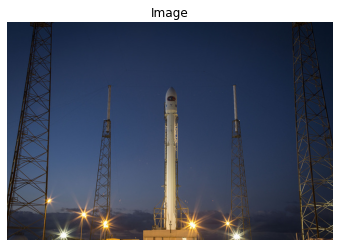

In [33]:
from skimage.transform import rescale

# Chargement de l'image à partir des données
rocket_image = data.rocket()

# Agrandir l'image pour qu'elle soit 3 fois plus grande
enlarged_rocket_image = rescale(rocket_image, 3, anti_aliasing=True, channel_axis=-1)

# Affichage de l'image originale
show_image(rocket_image)


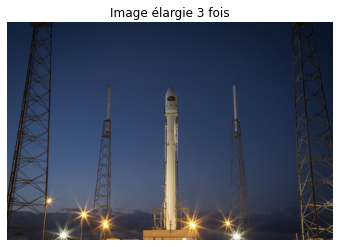

In [34]:
show_image(enlarged_rocket_image, 'Image élargie 3 fois')

<br/><br/>

### 📝Redimensionnement proportionnel
Nous voulons redimensionner les images d'un site Web de blog vétérinaire afin qu'elles aient toutes la même taille compressée.

Il est important que vous le fassiez de manière proportionnelle, ce qui signifie qu'elles ne sont pas déformées.

Vous allez d'abord l'essayer pour une image afin de savoir quel code tester plus tard dans le reste des images.

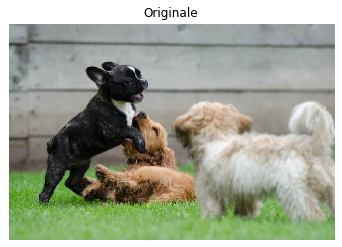

In [35]:
from skimage.transform import resize

dogs_banner = plt.imread('data/CM_SampleImages/Chapter2/dogs_banner.png')

# Set proportional height so its half its size
height = int(dogs_banner.shape[0] / 2)
width = int(dogs_banner.shape[1] / 2)

# Resize using the calculated proportional height and width
image_resized = resize(dogs_banner, (height, width), anti_aliasing=True)

# Show the original image
show_image(dogs_banner, "Originale")

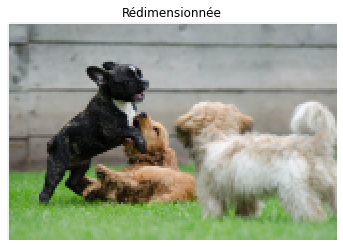

In [36]:
show_image(image_resized, 'Rédimensionnée')

<br/><br/>

#  📙 Morphologie
Les régions binaires produites par un simple seuillage peuvent être déformées par le bruit et la texture. 
Pour supprimer ce type de distorsion, nous pouvons utiliser le filtrage morphologique.

Les opérations de filtrage morphologique tentent de supprimer ces imperfections en tenant compte de la forme et de la structure des objets dans l'image. 
Ces opérations sont particulièrement adaptées aux images binaires, mais certaines peuvent s'étendre aux images en niveaux de gris.

### 📌 Opérations morphologiques
Les opérations morphologiques de base sont :
- Dilatation (Ajout de pixels aux limites des objets dans une image)
- Érosion (Suppression de pixels aux limites des objets)

<img src="data/CM_SampleImages/Chapter2/morphological_op.png" center />

Le nombre de pixels ajoutés ou retirés des objets d'une image dépend de la taille et de la forme d'un **élément structurant** utilisé pour traiter l'image.

**Élément structurant:** L'élément structurant est une petite image binaire utilisée pour sonder l'image d'entrée.

#### Formes dans scikit-image
scikit-image propose plusieurs formes pour cet élément structurant, chacune ayant sa propre méthode issue du module de morphologie. Si nous voulons un carré comme élément structuré, nous pouvons l'obtenir avec la méthode du carré. Ou un rectangle avec une largeur et une hauteur. Cela retournera la forme désirée et si nous imprimons, nous verrons comment ils sont formés avec des 1.

```python
from skimage import morphology

square = morphology.square(4)
[[1 1 1 1]
[1 1 1 1]
[1 1 1 1]
[1 1 1 1]]

rectangle = morphology.rectangle(4, 2)
[[1 1]
[1 1]
[1 1]
[1 1]]
```


### 📌 Erosion avec scikit-image
```python
from skimage import morphology

# Définir l'élément de structuration à la forme rectangulaire
selem = rectangle(12,6)

# Obtenir l'image érodée avec l'érosion binaire
eroded_image = morphology.binary_erosion(image_horse, selem=selem)

# Erosion binaire avec selem par défaut (pour cela, nous n'avons pas besoin de spécifier un selem)
eroded_image = morphology.binary_erosion(image_horse)
```

### 📌 Dilation avec scikit-image
```python
from skimage import morphology

# Obtenir une image dilatée, en utilisant la dilatation binaire.
dilated_image = morphology.binary_dilation(image_horse)

# Affichage des résultats
plot_comparison(image_horse, dilated_image, 'Erosion')
```

### 📝 Caractères manuscrits
Une utilisation très intéressante de la vision par ordinateur dans des solutions réelles consiste à effectuer une reconnaissance optique de caractères (OCR) pour distinguer des caractères imprimés ou manuscrits dans des images numériques de documents physiques.

Essayons d'améliorer la définition de cette lettre manuscrite afin qu'elle soit plus facile à classer.

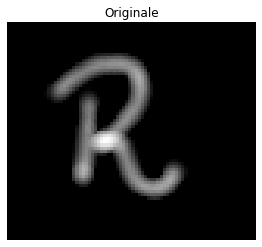

In [37]:
from skimage import morphology

upper_r_image = plt.imread('data/CM_SampleImages/Chapter2/r5.png')
upper_r_image = color.rgb2gray(upper_r_image)

# Obtenir la forme érodée
eroded_image_shape = morphology.binary_erosion(upper_r_image)

# Affichage des résultats
show_image(upper_r_image, 'Originale')

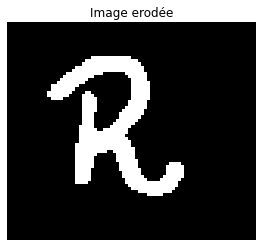

In [38]:
show_image(eroded_image_shape, 'Image erodée')

<br/><br/>

### 📝 Amélioration d'une image seuillée
Dans cet exercice, nous allons essayer de réduire le bruit d'une image seuillée en utilisant l'opération morphologique de dilatation.

Cette opération permet, en quelque sorte, de dilater les objets de l'image.

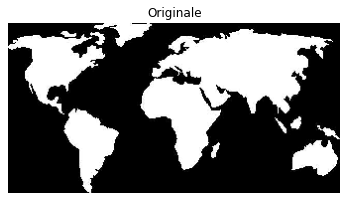

In [39]:
world_image = plt.imread('data/CM_SampleImages/Chapter2/world_image.png')

# Obtenir la forme dilatée
dilated_image = morphology.binary_dilation(world_image)
dilated_image = color.rgb2gray(color.rgba2rgb(dilated_image))

# Affichage des résultats
show_image(world_image, 'Originale')

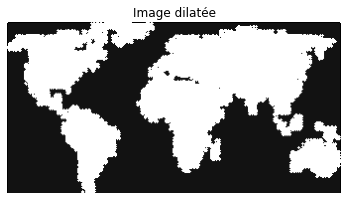

In [40]:
show_image(dilated_image, 'Image dilatée')